Step 1: Define our imports (assumes `Binary.py` lives in the same directory as this notebook)

In [67]:
import Binary

from glob import glob
import os

import numpy as np
import matplotlib.pyplot as plt

Step 2: Point to data directory and load. This directory contains data from one continuous data source (File Reader with ID 100) and one spike data source (Spike Detector with ID 102).

In [43]:
Folder = '/Users/franman/Documents/Open Ephys/2021-09-27_15-33-30/Record Node 103'

data, sample_rate = Binary.Load(Folder, Experiment=1, Recording=1)

Loading recording 1 ...
Converting to uV... Done.


Step 3: Parse the `data` object to find our continuous data

In [48]:
data.keys()

dict_keys(['100'])

In [49]:
data['100'].keys() # processor ID

dict_keys(['0'])

In [50]:
data['100']['0'].keys() # experiment index

dict_keys(['0'])

In [52]:
data['100']['0']['0'].shape # recording index

(613307, 16)

Step 4: Load the continuous timestamps for processor 100

In [72]:
continuous_directory = glob(os.path.join(Folder, 'experiment1', 'recording1', 'continuous', '*-100*'))[0]

timestamps = np.load(os.path.join(continuous_directory, 'timestamps.npy'))

Step 5: Plot one second of data from one channel

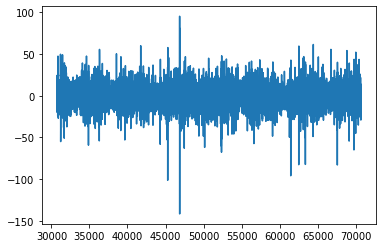

In [74]:
channel_one = data['100']['0']['0'][:40000, 0]

t = timestamps[:40000]

plt.plot(t, channel_one)

Step 6: Load spike data (this is easy because it's saved in `numpy` format)

In [77]:
spikes_directory = glob(os.path.join(Folder, 'experiment1', 'recording1', 'spikes', 'Spike_Detector*','*'))[0]

In [78]:
electrode_indices = np.load(os.path.join(spikes_directory, 'spike_electrode_indices.npy'))
spike_times = np.load(os.path.join(spikes_directory, 'spike_times.npy'))

Step 7: Plot spike times for electrode 1 overlaid on channel 1

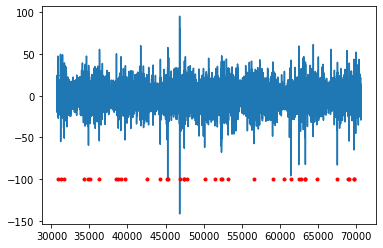

In [83]:
plt.plot(t, channel_one)

st = spike_times[(spike_times < t[-1]) * (electrode_indices == 1)]

plt.plot(st, np.ones(st.size)* -100, '.r')